In [1]:
%matplotlib inline

from analysis import separate_logs, get_table
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
logs = separate_logs('mnist_eqiv_branch_s=0_delta=0_pi=0.txt')
df = get_table(logs[-1])

In [3]:
df

,SolFound,Expl,Unexpl,Obj,Depth,IntInf,Incumbent,BestBd,Gap,It/Node,Time
0,0,0.0,0.0,163.74815,0.0,24.0,NaN,163.74815,NaN,NaN,0.0
1,0,0.0,0.0,144.47346,0.0,69.0,NaN,144.47346,NaN,NaN,0.0
2,0,0.0,0.0,142.30701,0.0,62.0,NaN,142.30701,NaN,NaN,0.0
3,0,0.0,0.0,141.86239,0.0,68.0,NaN,141.86239,NaN,NaN,0.0
4,0,0.0,0.0,138.05164,0.0,61.0,NaN,138.05164,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
141,0,190758.0,116431.0,0.43362,75.0,19.0,0.0,43.87822,NaN,63.6,580.0
142,0,192530.0,117539.0,23.94101,58.0,36.0,0.0,43.79486,NaN,63.5,585.0
143,0,194417.0,118786.0,0.20832,71.0,28.0,0.0,43.69557,NaN,63.5,590.0
144,0,196416.0,120152.0,36.66386,47.0,47.0,0.0,43.58483,NaN,63.5,595.0


In [4]:
df.drop_duplicates(subset='Time', keep='last', inplace=True)

In [5]:
df

,SolFound,Expl,Unexpl,Obj,Depth,IntInf,Incumbent,BestBd,Gap,It/Node,Time
24,0,0.0,0.0,124.91261,0.0,48.0,NaN,124.91261,NaN,NaN,0.0
30,0,0.0,2.0,124.91261,0.0,32.0,0.0,124.91261,NaN,NaN,1.0
31,0,745.0,623.0,39.14078,27.0,32.0,0.0,90.52475,NaN,80.1,5.0
32,0,1372.0,969.0,86.82928,20.0,64.0,0.0,89.27102,NaN,89.1,10.0
33,0,2957.0,1744.0,50.88216,30.0,52.0,0.0,87.45599,NaN,74.6,15.0
...,...,...,...,...,...,...,...,...,...,...,...
141,0,190758.0,116431.0,0.43362,75.0,19.0,0.0,43.87822,NaN,63.6,580.0
142,0,192530.0,117539.0,23.94101,58.0,36.0,0.0,43.79486,NaN,63.5,585.0
143,0,194417.0,118786.0,0.20832,71.0,28.0,0.0,43.69557,NaN,63.5,590.0
144,0,196416.0,120152.0,36.66386,47.0,47.0,0.0,43.58483,NaN,63.5,595.0


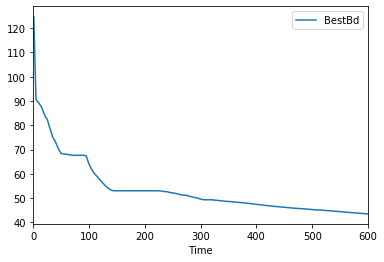

In [6]:
df.plot(x ='Time', y='BestBd', kind = 'line')
plt.show()

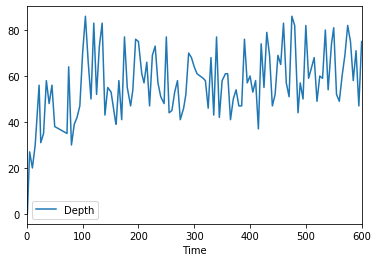

In [7]:
df.plot(x='Time', y='Depth', kind='line')
plt.show()

In [8]:
logs = separate_logs('mnist_eqiv_branch_s=0_delta=0_pi=1.txt')
df_pi = get_table(logs[-1])
df_pi.drop_duplicates(subset='Time', keep='last', inplace=True)

logs = separate_logs('mnist_eqiv_branch_s=0_delta=1_pi=0.txt')
df_delta = get_table(logs[-1])
df_delta.drop_duplicates(subset='Time', keep='last', inplace=True)

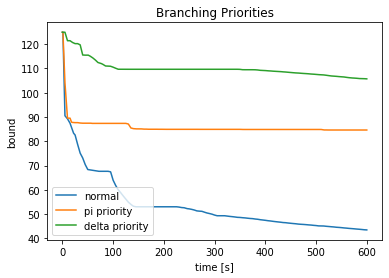

In [9]:
plt.plot('Time', 'BestBd', data=df, label='normal')
plt.plot('Time', 'BestBd', data=df_pi, label='pi priority')
plt.plot('Time', 'BestBd', data=df_delta, label='delta priority')

plt.xlabel('time [s]')
plt.ylabel('bound')

plt.title("Branching Priorities")

plt.legend()

plt.show()

plt.show()

In [10]:
logs = separate_logs('mnist_eqiv_one_hot_partial_top_3.txt')
df_partial = get_table(logs[-1])
df_partial.drop_duplicates(subset='Time', keep='last', inplace=True)

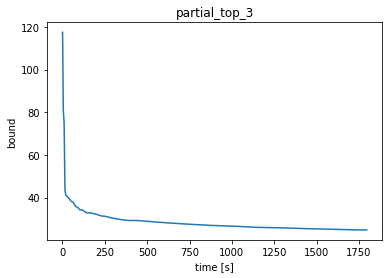

In [13]:
plt.plot('Time', 'BestBd', data=df_partial)

plt.xlabel('time [s]')
plt.ylabel('bound')

# plt.yscale('log')

plt.title("partial_top_3")

plt.show()

In [14]:
logs = separate_logs('mnist_eqiv_one_hot_partial_top_1.txt')
df_partial1 = get_table(logs[-1])
df_partial1.drop_duplicates(subset='Time', keep='last', inplace=True)

logs = separate_logs('mnist_eqiv_ranking_top_1.txt')
df_ranking1 = get_table(logs[-1])
df_ranking1.drop_duplicates(subset='Time', keep='last', inplace=True)

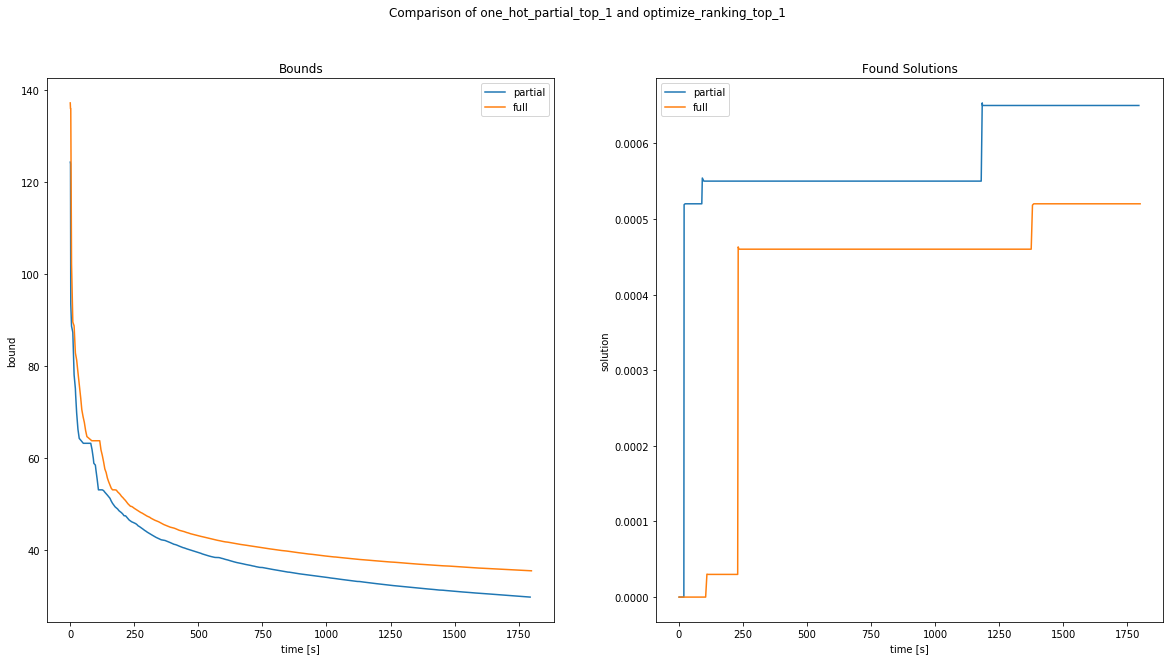

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Comparison of one_hot_partial_top_1 and optimize_ranking_top_1')

ax1.plot('Time', 'BestBd', data=df_partial1, label='partial')
ax1.plot('Time', 'BestBd', data=df_ranking1, label='full')

ax1.set_xlabel('time [s]')
ax1.set_ylabel('bound')

ax1.title.set_text('Bounds')
ax1.legend()

ax2.plot('Time', 'Incumbent', data=df_partial1, label='partial')
ax2.plot('Time', 'Incumbent', data=df_ranking1, label='full')

ax2.title.set_text('Found Solutions')
ax2.legend()

ax2.set_xlabel('time [s]')
ax2.set_ylabel('solution')

plt.show()